In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import itertools
from matplotlib.pyplot import figure

In [ ]:
## Final data

In [13]:
Q1  = '''Recipient First Name Recipient Last Name	 Michelleann Avilla	 Brittany Ballou	 Laura Book	 April Crabb-Vieth	 Becky Fendrick	 Hope Hibler	 Natasha Jensen	 Amy Nitchals	 Anthony Reisdorff	 Amy Sokoll	 Carroll Steiner	 Lindsay Wilson
Michelleann Kim	0	4	2	3	3	2	2	2	2	2	4	2
Brittany Ballou	4	4	2	3	3	3	2	3	2	3	4	2
Laura Book	3	3	3	3	3	3	3	3	4	3		3
April Vieth	0											0
Becky Fendrick	3	4			4	3		4			2	0
Hope Hibler	2	2	2	2	4	4	2	4	2	3	3	2
Tasha Jensen	2	2	2	2	2		4	2	3	3	2	2
Amy Nitchals	2	3	2	2	4	4	2	4	2	4	3	2
Tony Reisdorff	0											0
Amy Sokoll	1	2	2	2	3	3	4	4	3	4	3	3
Carroll Steiner	4	4	2	3	3	3	3	3	3	3	4	3
Lindsay Wilson	3	3	3	4	3	3	4	3	4	3	3	4'''

In [14]:
data = [y for y in [x.strip() for x in Q1.splitlines()] if y]

In [15]:
set= []
for x in data:
    x = x.strip()
    x = x.split("\t")
    set.append(x)
data = set

In [16]:
nodes = data[0]
nodes = nodes[1::]
for i in range(len(nodes)):
    
    print(str(i)+" "+ str(nodes[i]))

0  Michelleann Avilla
1  Brittany Ballou
2  Laura Book
3  April Crabb-Vieth
4  Becky Fendrick
5  Hope Hibler
6  Natasha Jensen
7  Amy Nitchals
8  Anthony Reisdorff
9  Amy Sokoll
10  Carroll Steiner
11  Lindsay Wilson


In [17]:
mat = []
for x in data[1::]:
    mat.append(x[1::])
n = len(mat)

for x in range(len(mat)):
    for y in range(len(mat[x])):
        if (mat[x][y]==''):
            continue
        if (int(mat[x][y])<=2 ):
            mat[x][y] = ''
        else:
            mat[x][y] = int(mat[x][y])

for i in range(0, n):
    for j in range(i+1, n):
        mat[i][j],mat[j][i] = mat[j][i],mat[i][j]

for i in range(len(mat)):
    print(mat[i])


['', 4, 3, '', 3, '', '', '', '', '', 4, 3]
[4, 4, 3, '', 4, '', '', 3, '', '', 4, 3]
['', '', 3, '', '', '', '', '', '', '', '', 3]
[3, 3, 3, '', '', '', '', '', '', '', 3, 4]
[3, 3, 3, '', 4, 4, '', 4, '', 3, 3, 3]
['', 3, 3, '', 3, 4, '', 4, '', 3, 3, 3]
['', '', 3, '', '', '', 4, '', '', 4, 3, 4]
['', 3, 3, '', 4, 4, '', 4, '', 4, 3, 3]
['', '', 4, '', '', '', 3, '', '', 3, 3, 4]
['', 3, 3, '', '', 3, 3, 4, '', 4, 3, 3]
[4, 4, '', '', '', 3, '', 3, '', 3, 4, 3]
['', '', 3, '', '', '', '', '', '', 3, 3, 4]


In [18]:
A = np.matrix(mat)
G=nx.from_numpy_matrix(A, create_using=nx.DiGraph())

{0: ' Michelleann Avilla', 1: ' Brittany Ballou', 2: ' Laura Book', 3: ' April Crabb-Vieth', 4: ' Becky Fendrick', 5: ' Hope Hibler', 6: ' Natasha Jensen', 7: ' Amy Nitchals', 8: ' Anthony Reisdorff', 9: ' Amy Sokoll', 10: ' Carroll Steiner', 11: ' Lindsay Wilson'}


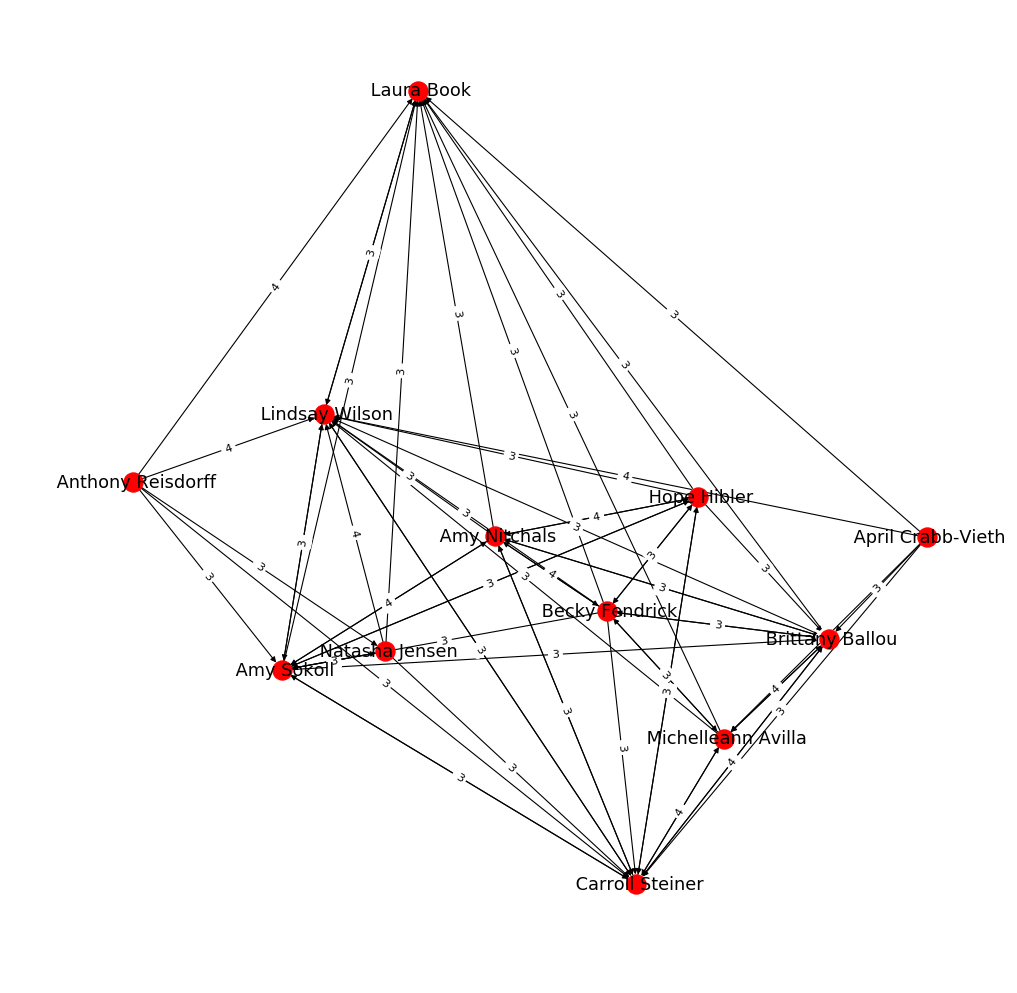

In [19]:
pos=nx.spring_layout(G) # positions for all nodes
figure(num=None, figsize=(12, 12), dpi=80)


nx.draw(G, pos)  # networkx draw()
x = 0
d = { i : nodes[i] for i in range(len(nodes)) }
print(d)

nx.draw_networkx_labels(G,pos,d,font_size=16)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.draw()  # pyplot draw()

In [20]:
# Centrality
# Compute the degree centrality for nodes.
print(nx.degree_centrality(G))

{0: 0.8181818181818182, 1: 1.3636363636363638, 2: 1.1818181818181819, 3: 0.4545454545454546, 4: 1.2727272727272727, 5: 1.1818181818181819, 6: 0.7272727272727273, 7: 1.2727272727272727, 8: 0.4545454545454546, 9: 1.4545454545454546, 10: 1.6363636363636365, 11: 1.4545454545454546}


In [21]:
# Centrality
# Compute the in-degree centrality for nodes.
print(nx.in_degree_centrality(G))

{0: 0.36363636363636365, 1: 0.7272727272727273, 2: 1.0, 3: 0.0, 4: 0.4545454545454546, 5: 0.4545454545454546, 6: 0.2727272727272727, 7: 0.5454545454545454, 8: 0.0, 9: 0.7272727272727273, 10: 1.0, 11: 1.0909090909090908}


In [22]:
for x in range(len(nodes)):
    print(str(x)+ " " +nodes[x])

0  Michelleann Avilla
1  Brittany Ballou
2  Laura Book
3  April Crabb-Vieth
4  Becky Fendrick
5  Hope Hibler
6  Natasha Jensen
7  Amy Nitchals
8  Anthony Reisdorff
9  Amy Sokoll
10  Carroll Steiner
11  Lindsay Wilson


In [23]:
# Centrality
# Compute the out-degree centrality for nodes.
print(nx.out_degree_centrality(G))

{0: 0.4545454545454546, 1: 0.6363636363636364, 2: 0.18181818181818182, 3: 0.4545454545454546, 4: 0.8181818181818182, 5: 0.7272727272727273, 6: 0.4545454545454546, 7: 0.7272727272727273, 8: 0.4545454545454546, 9: 0.7272727272727273, 10: 0.6363636363636364, 11: 0.36363636363636365}


In [24]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.013528138528138525, 1: 0.039935064935064934, 2: 0.0, 3: 0.0, 4: 0.02727272727272727, 5: 0.017207792207792207, 6: 0.0, 7: 0.02478354978354978, 8: 0.0, 9: 0.15346320346320344, 10: 0.1662337662337662, 11: 0.09393939393939392}


In [25]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))


{(0, 1): 0.0101010101010101, (0, 2): 0.00883838383838384, (0, 4): 0.02895021645021645, (0, 10): 0.01893939393939394, (0, 11): 0.012626262626262626, (1, 0): 0.016414141414141412, (1, 1): 0.0, (1, 2): 0.00883838383838384, (1, 4): 0.030753968253968252, (1, 7): 0.0202020202020202, (1, 10): 0.013888888888888888, (1, 11): 0.011363636363636364, (2, 2): 0.0, (2, 11): 0.06818181818181818, (3, 0): 0.011363636363636364, (3, 1): 0.015151515151515152, (3, 2): 0.007575757575757576, (3, 10): 0.026515151515151516, (3, 11): 0.015151515151515152, (4, 0): 0.012626262626262626, (4, 1): 0.007575757575757576, (4, 2): 0.007575757575757576, (4, 4): 0.0, (4, 5): 0.013888888888888888, (4, 7): 0.0101010101010101, (4, 9): 0.023989898989898988, (4, 10): 0.007575757575757576, (4, 11): 0.007575757575757576, (5, 1): 0.0101010101010101, (5, 2): 0.00883838383838384, (5, 4): 0.023178210678210676, (5, 5): 0.0, (5, 7): 0.007575757575757576, (5, 9): 0.015151515151515152, (5, 10): 0.0101010101010101, (5, 11): 0.007575757575

In [26]:
G.edges(data=True)

OutEdgeDataView([(0, 1, {'weight': '4'}), (0, 2, {'weight': '3'}), (0, 4, {'weight': '3'}), (0, 10, {'weight': '4'}), (0, 11, {'weight': '3'}), (1, 0, {'weight': '4'}), (1, 1, {'weight': '4'}), (1, 2, {'weight': '3'}), (1, 4, {'weight': '4'}), (1, 7, {'weight': '3'}), (1, 10, {'weight': '4'}), (1, 11, {'weight': '3'}), (2, 2, {'weight': '3'}), (2, 11, {'weight': '3'}), (3, 0, {'weight': '3'}), (3, 1, {'weight': '3'}), (3, 2, {'weight': '3'}), (3, 10, {'weight': '3'}), (3, 11, {'weight': '4'}), (4, 0, {'weight': '3'}), (4, 1, {'weight': '3'}), (4, 2, {'weight': '3'}), (4, 4, {'weight': '4'}), (4, 5, {'weight': '4'}), (4, 7, {'weight': '4'}), (4, 9, {'weight': '3'}), (4, 10, {'weight': '3'}), (4, 11, {'weight': '3'}), (5, 1, {'weight': '3'}), (5, 2, {'weight': '3'}), (5, 4, {'weight': '3'}), (5, 5, {'weight': '4'}), (5, 7, {'weight': '4'}), (5, 9, {'weight': '3'}), (5, 10, {'weight': '3'}), (5, 11, {'weight': '3'}), (6, 2, {'weight': '3'}), (6, 6, {'weight': '4'}), (6, 9, {'weight': '4'}

In [79]:
# Question 2 in order
Recipient First Name Recipient Last Name	Michelleann Avilla	Brittany Ballou	Laura Book 	April Crabb-Vieth 	Becky Fendrick 	Hope Hibler 	Natasha Jensen 	Amy Nitchals 	Anthony Reisdorff 	Amy Sokoll 	Carroll Steiner 	Lindsay Wilson 
Michelleann Kim		1	3	2	2	3	3	3	3	3	1	3
Brittany Ballou	1,2	1,2	3	3	1,2	1,2	3	1,2	3	1,2	1,2	3
Laura Book	3	3	3	2	2	2	2	2	1,2	2	2	2
April Vieth												
Becky Fendrick	1	1				1		1				
Hope Hibler	3	2	3	3	1,2	1,2	3	1,2	3	1,2	1,2	3
Tasha Jensen	3	3	3	3	3	3	3	3	1,3	3	3	3
Amy Nitchals	3	1	3	3	1,2	1,2	3	1,2	3	1,2	1	2
Tony Reisdorff												
Amy Sokoll	3	3	2	3	2	1,2	1,2	1,2	3	1,2	1,2	1,2
Carroll Steiner	1,2	1,2	3	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2
Lindsay Wilson	3	3	3	1,2	3	3	1,2	3	1,2	3	3	3



Sarah Stratman
Kelly Arbuckle
Tamara Gass
Vincent Gregorio
Sarah Kroenke
Alexandra Bastian
Hilary Caldwell
Alex Muessigmann
Bethany Neuhart
Ted Stocking
Stephanie Barker
Jake Kment
Alex Kreft
Rachel Mulder
Natalie Palmgren
Mary Quandt


In [28]:
Q2 = '''Michelleann Avilla	Brittany Ballou	Laura Book 	April Crabb-Vieth 	Becky Fendrick 	Hope Hibler 	Natasha Jensen 	Amy Nitchals 	Anthony Reisdorff 	Amy Sokoll 	Carroll Steiner 	Lindsay Wilson 
0	1	3			3	3	3	3	3	1	3
1	1	3	3	1	1	3	1	3	1	1	3
3	3	3						1			0
0											0
1	1				1		1				0
3		3	3	1	1	3	1	3	1	1	3
3	3	3	3	3	3	3	3	1,3	3	3	3
3	1	3	3	1	1	3	1	3	1	1	0
0											0
3	3		3		1	1	1	3	1	1	1
1	1	3	1	1	1	1	1	1	1	1	1
3	3	3	1	3	3	1	3	1	3	3	3
'''

In [29]:
data2 = [y for y in [x for x in Q2.splitlines()] if y]
# for x in data:
#     print(x)
set2= []
for x in data2:
    x = x.split("\t")
    set2.append(x)
data2 = set2
nodes = data2[0]
nodesR = nodes.copy()
nodesL = nodes.copy()


In [30]:
from networkx.algorithms import bipartite
B = nx.Graph()
for i in range(len(nodes)):
    nodesL[i] = nodes[i]+"L"
for i in range(len(nodes)):
    nodesR[i] = nodes[i]+"R"
B.add_nodes_from(nodesL, bipartite=0)
B.add_nodes_from(nodesR, bipartite=1)



In [31]:
print(nodes)
for x in range(len(data2)):
    for y in range(len(data2[x])):
        if data2[x][y] == '1':
            B.add_edges_from([(nodesL[x-1], nodesR[y])])

['Michelleann Avilla', 'Brittany Ballou', 'Laura Book ', 'April Crabb-Vieth ', 'Becky Fendrick ', 'Hope Hibler ', 'Natasha Jensen ', 'Amy Nitchals ', 'Anthony Reisdorff ', 'Amy Sokoll ', 'Carroll Steiner ', 'Lindsay Wilson ']


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


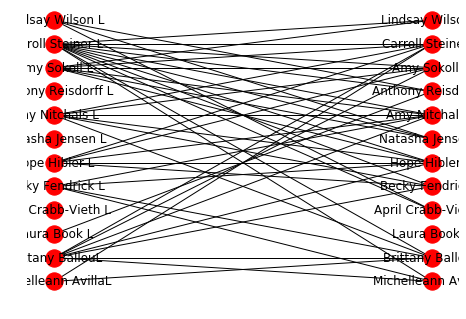

In [32]:
pos = dict()
inc = 1

pos.update( (n, (1, i*2)) for i, n in enumerate(nodesL) ) # put nodes from X at x=1
pos.update( (n, (2, i*2)) for i, n in enumerate(nodesR) ) # put nodes from Y at x=2
edges = B.edges()

nx.draw(B, pos=pos, edges=edges, with_labels = True)
plt.show()

In [33]:
print(B.nodes(data=True))

[('Michelleann AvillaL', {'bipartite': 0}), ('Brittany BallouL', {'bipartite': 0}), ('Laura Book L', {'bipartite': 0}), ('April Crabb-Vieth L', {'bipartite': 0}), ('Becky Fendrick L', {'bipartite': 0}), ('Hope Hibler L', {'bipartite': 0}), ('Natasha Jensen L', {'bipartite': 0}), ('Amy Nitchals L', {'bipartite': 0}), ('Anthony Reisdorff L', {'bipartite': 0}), ('Amy Sokoll L', {'bipartite': 0}), ('Carroll Steiner L', {'bipartite': 0}), ('Lindsay Wilson L', {'bipartite': 0}), ('Michelleann AvillaR', {'bipartite': 1}), ('Brittany BallouR', {'bipartite': 1}), ('Laura Book R', {'bipartite': 1}), ('April Crabb-Vieth R', {'bipartite': 1}), ('Becky Fendrick R', {'bipartite': 1}), ('Hope Hibler R', {'bipartite': 1}), ('Natasha Jensen R', {'bipartite': 1}), ('Amy Nitchals R', {'bipartite': 1}), ('Anthony Reisdorff R', {'bipartite': 1}), ('Amy Sokoll R', {'bipartite': 1}), ('Carroll Steiner R', {'bipartite': 1}), ('Lindsay Wilson R', {'bipartite': 1})]


In [34]:
nx.is_connected(B)

False

In [35]:
Q3 = '''Michelleann Avilla	Brittany Ballou	Laura Book 	April Crabb-Vieth 	Becky Fendrick 	Hope Hibler 	Natasha Jensen 	Amy Nitchals 	Anthony Reisdorff 	Amy Sokoll 	Carroll Steiner 	Lindsay Wilson 
0		3	2	2	3	3	3	3	3		3
2	2	3	3	2	2	3	2	3	2	2	3
3	3	3	2	2	2	2	2	2	2	2	2
0											0
0											0
3	2	3	3	2	2	3	2	3	2	2	3
3	3	3	3	3	3	3	3	3	3	3	3
3		3	3	2	2	3	2	3	2		2
0											0
3	3	2	3	2	2	2	2	3	2	2	2
2	2	3	2	2	2	2	2	2	2	2	2
3	3	3	2	3	3	2	3	2	3	3	3
'''

In [36]:
data3 = [y for y in [x for x in Q3.splitlines()] if y]
# for x in data:
#     print(x)
set3= []
for x in data3:
    x = x.split("\t")
    set3.append(x)
data3 = set3
nodes = data3[0]
nodesR = nodes.copy()
nodesL = nodes.copy()

In [37]:
from networkx.algorithms import bipartite
B2 = nx.Graph()
for i in range(len(nodes)):
    nodesL[i] = nodes[i]+"L"
for i in range(len(nodes)):
    nodesR[i] = nodes[i]+"R"
B2.add_nodes_from(nodesL, bipartite=0)
B2.add_nodes_from(nodesR, bipartite=1)

In [38]:
for x in range(len(data3)):
    for y in range(len(data3[x])):
        if data3[x][y] == '2':
            B2.add_edges_from([(nodesL[x-1], nodesR[y])])

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


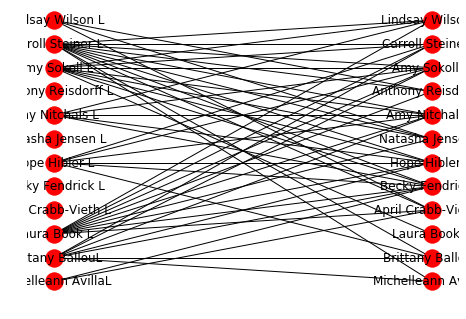

In [39]:
pos = dict()

pos.update( (n, (1, i*2)) for i, n in enumerate(nodesL) ) # put nodes from X at x=1
pos.update( (n, (2, i*2)) for i, n in enumerate(nodesR) ) # put nodes from Y at x=2

nx.draw(B2, pos=pos, edges=edges, with_labels = True)
plt.show()